<a href="https://colab.research.google.com/github/Taiga-U/bug-free-umbrella/blob/main/makegraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving slurm-254204.dat to slurm-254204.dat


{'slurm-254204.dat': b'   1   16     0.3000000   10          732  8.624801e-01   -5.158306e-01  1.612927e-04   9.131003e-02  1.549285e-04   1.007839e+01  2.657172e-02   2.656149e-01  5.556623e-04   3.318196e+00  7.501931e-03   2.529310e+01  9.189450e-02   3.201630e-01  2.696502e-04   1.857653e-01  1.808916e-04  3.224547e+00  6.448984e-03  7.792427e+00  1.215116e-02  5.228398e+00  0.000000e+00  2.958320e+00  2.006247e-03\n   1   16     0.4000000   10          613  6.710996e-01   -4.786278e-01  1.720394e-04   1.050635e-01  1.476981e-04   4.208294e+00  4.769095e-03   1.474556e-01  1.417064e-04   1.897547e+00  1.808337e-03   9.602799e+00  1.616635e-02   3.418205e-01  2.001423e-04   1.934097e-01  1.312404e-04  2.088033e+00  1.793915e-03  5.432599e+00  3.576064e-03  3.779404e+00  0.000000e+00  1.434753e+00  1.403775e-03\n   1   16     0.6000000   10          486  4.745971e-01   -4.032621e-01  1.197433e-04   1.158117e-01  6.564143e-05   1.452335e+00  1.424999e-03   6.097962e-02  5.487592e-05 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [ ]:
data = np.loadtxt("./slurm-254204.dat")

In [ ]:
temp = data[:,2]
print(temp)

energy = data[:,6]
energy_err = data[:,7]
print(usus_err)

usus = data[:,8]
usus_err = data[:,9]

ssus = data[:,10]
ssus_err = data[:,11]


dynamic_structure_factor = data[:,12]
dynamic_structure_factor_err = data[:,13]

static_structure_factor = data[:,14]
static_structure_factor_err = data[:,15]

Nz = data[:,16]
Nz_err = data[:,17]

static_structure_factor2 = data[:,18]
static_structure_factor2_err = data[:,19]

static_structure_factor3 = data[:,20]
static_structure_factor3_err = data[:,21]

inverse_gap = data[:,22]
inverse_gap_err = data[:,23]

correlation_length_x = data[:,24]
correlation_length_x_err = data[:,25]

correlation_length_y = data[:,26]
correlation_length_y_err = data[:,27]

[0.3 0.4 0.6 0.7 0.8 0.9 1.2 1.4 1.6 1.8 2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8]
[1.549285e-04 1.476981e-04 6.564143e-05 9.169058e-05 8.471973e-05
 5.756783e-05 5.803083e-05 4.275039e-05 3.519018e-05 2.523644e-05
 2.321224e-05 2.086672e-05 1.630337e-05 1.630844e-05 1.433796e-05
 1.175222e-05 1.395540e-05 1.331595e-05 7.905619e-06 1.156072e-05
 1.130981e-05 1.136403e-05 7.637445e-06 4.313421e-06]


In [46]:
# 藤井 岳 キュリーワイスフィッティングの関数
def CW_fit(xx,yy,t_low,t_high,M_atom_number):
    temp_range = (t_low<xx)&(xx<t_high)
    
    def line(xx,a,c):
        yy = a*xx + c
        return yy
    
    results,err = optimize.curve_fit(line, xx[temp_range], yy[temp_range])
    # print(results)
    
    mu = 3*1.3806E-16*(1/(results[0]))/(6.022E+23)/(9.274E-21)**2
    # print(mu)
    return np.sqrt(mu/M_atom_number), -results[1]/results[0], results[0], results[1]

def line(xx,a,c):
        yy = a*xx + c
        return yy

In [49]:
#　グラフ微調整
plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14                       #フォントの大きさ
plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


以下、個別にグラフを生成

Text(0, 0.5, 'Energy')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


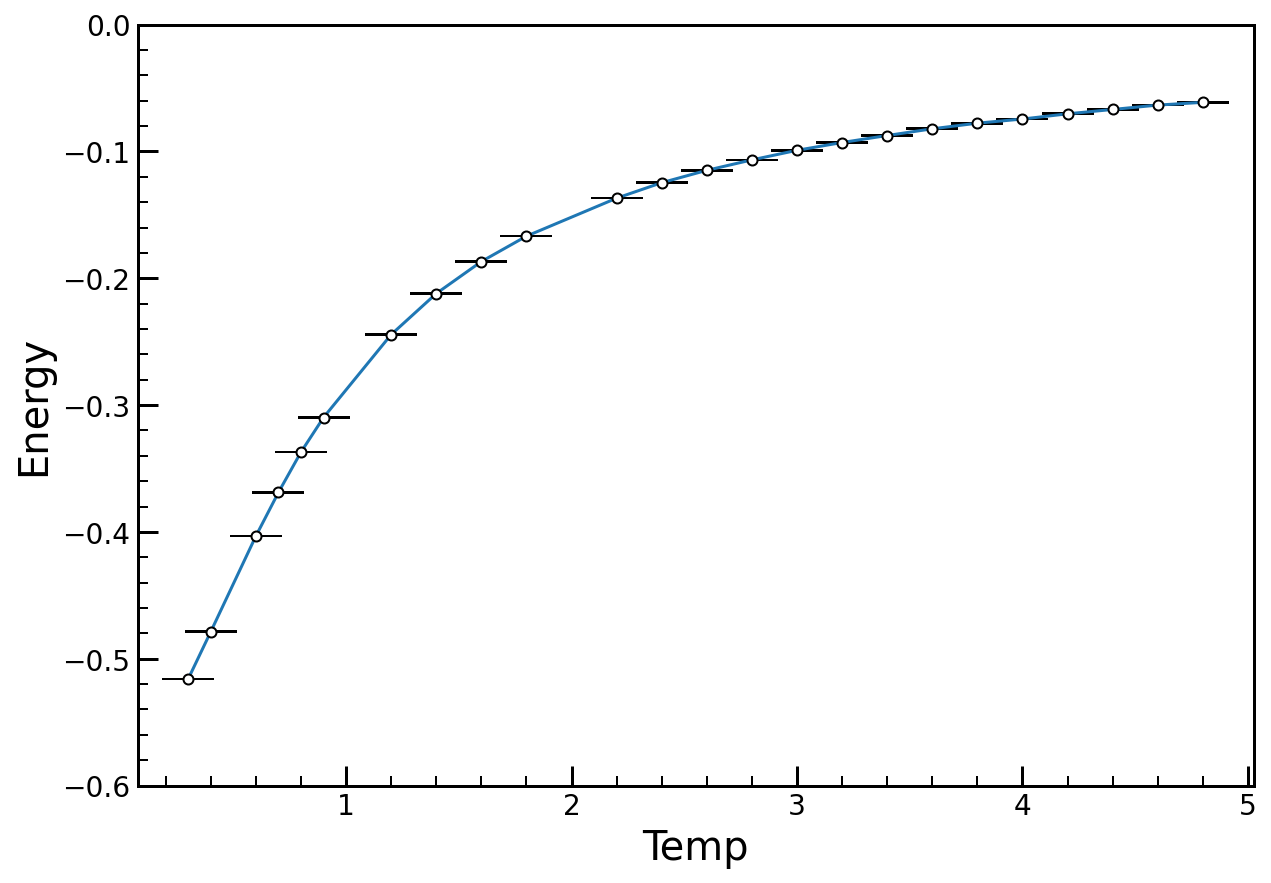

In [ ]:
x = temp
y = energy
y_err = energy_err

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')

plt.plot(x, y)
plt.ylim(-0.6,0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('Energy', fontsize=20)


# plt.savefig('y_error_bar.png')

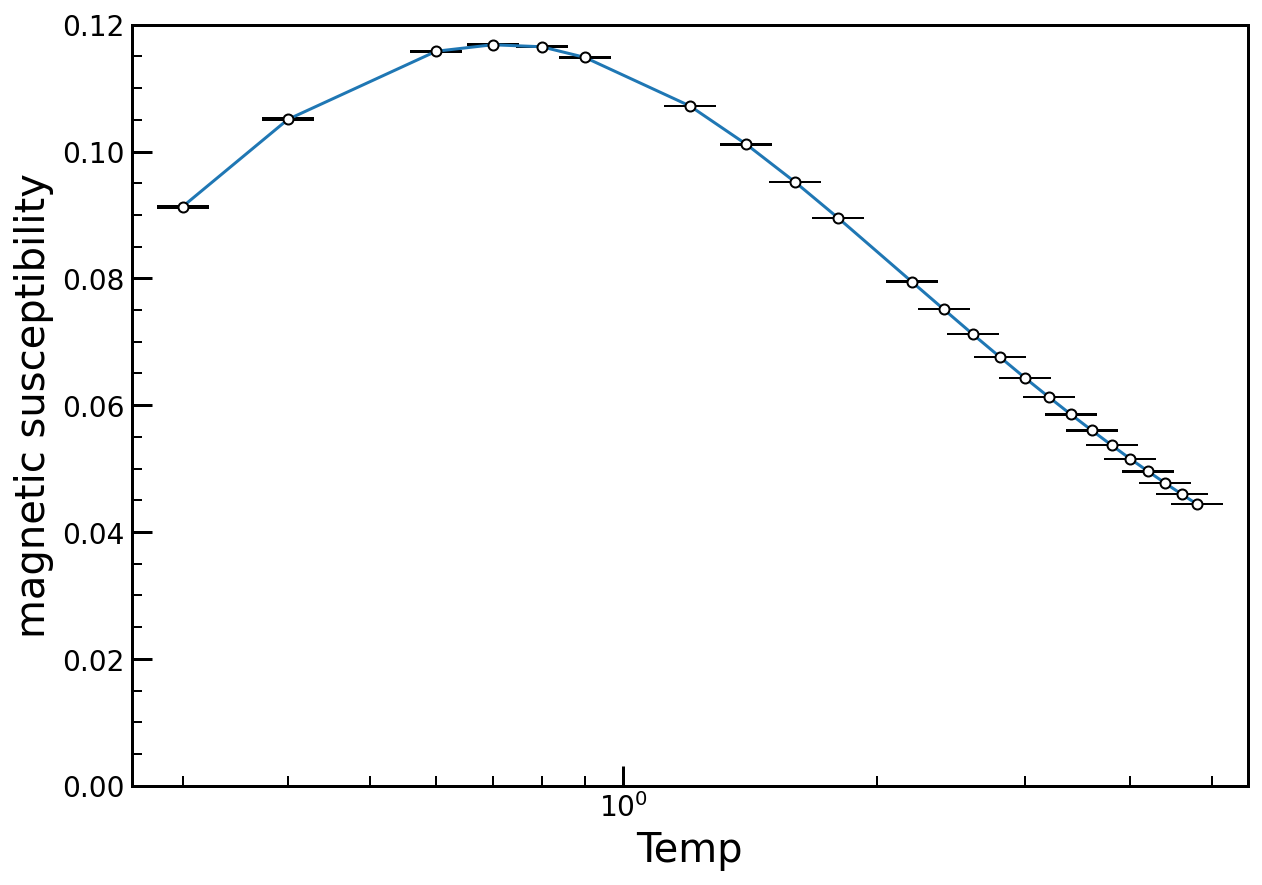

In [48]:
x = temp
y = usus
y_err = usus_err

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')

plt.plot(x, y)
plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('magnetic susceptibility', fontsize=20)
plt.xscale('log')

# plt.savefig('y_error_bar.png')

Text(3, 3, 'C = 3.717')

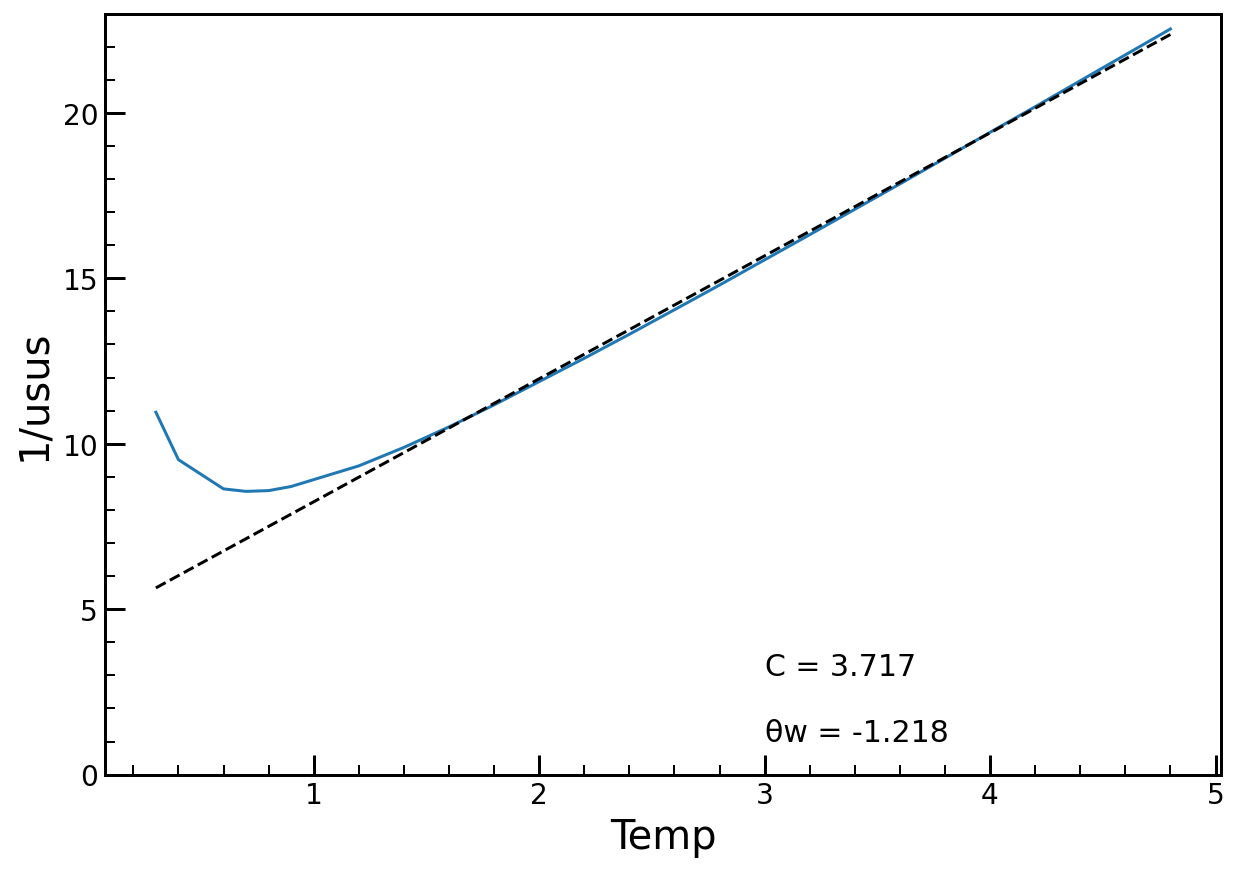

In [64]:
x = temp
y = 1/usus
# y_err = usus_err

plt.figure(figsize=(10,7))

plt.plot(x, y)
plt.ylim(0,23)
# plt.xlim(0.0,5.0)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('1/usus', fontsize=20)
# plt.xscale('log')

chaifit = CW_fit(x,y, 1,5,1)
xx = temp
yy = chaifit[2]*xx + chaifit[3]
plt.plot(xx,yy,"--",color = "0")
plt.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
plt.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

# plt.savefig('y_error_bar.png')

Text(0, 0.5, 'staggered susceptibility')

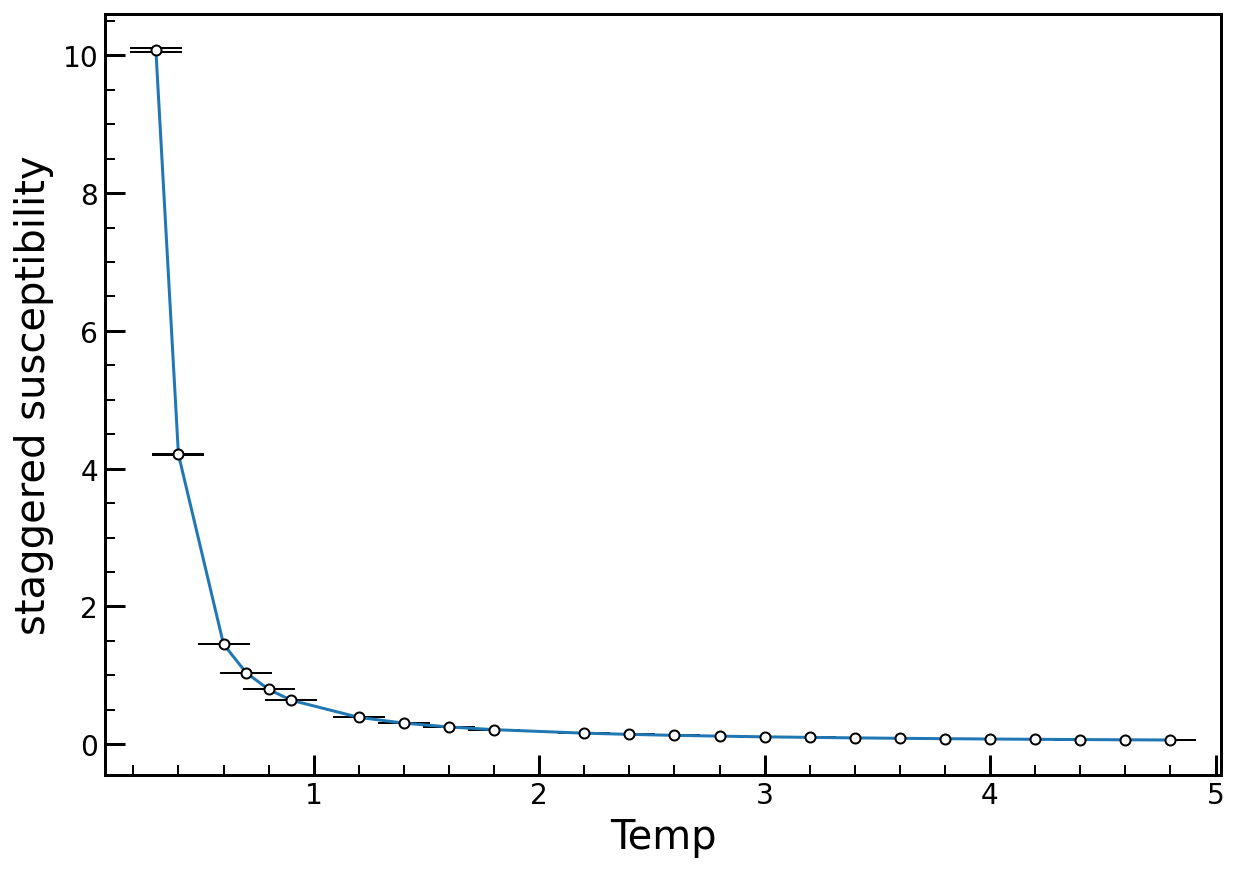

In [62]:
x = temp
y = ssus
y_err = ssus_err

plt.figure(figsize=(10,7))
plt.errorbar(x, y, yerr = y_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
# plt.ylim(0,0.12)
# plt.xlim(0.0,5.0)
plt.plot(x,y)

plt.xlabel('Temp', fontsize=20)
plt.ylabel('staggered susceptibility', fontsize=20)


# plt.savefig('y_error_bar.png')

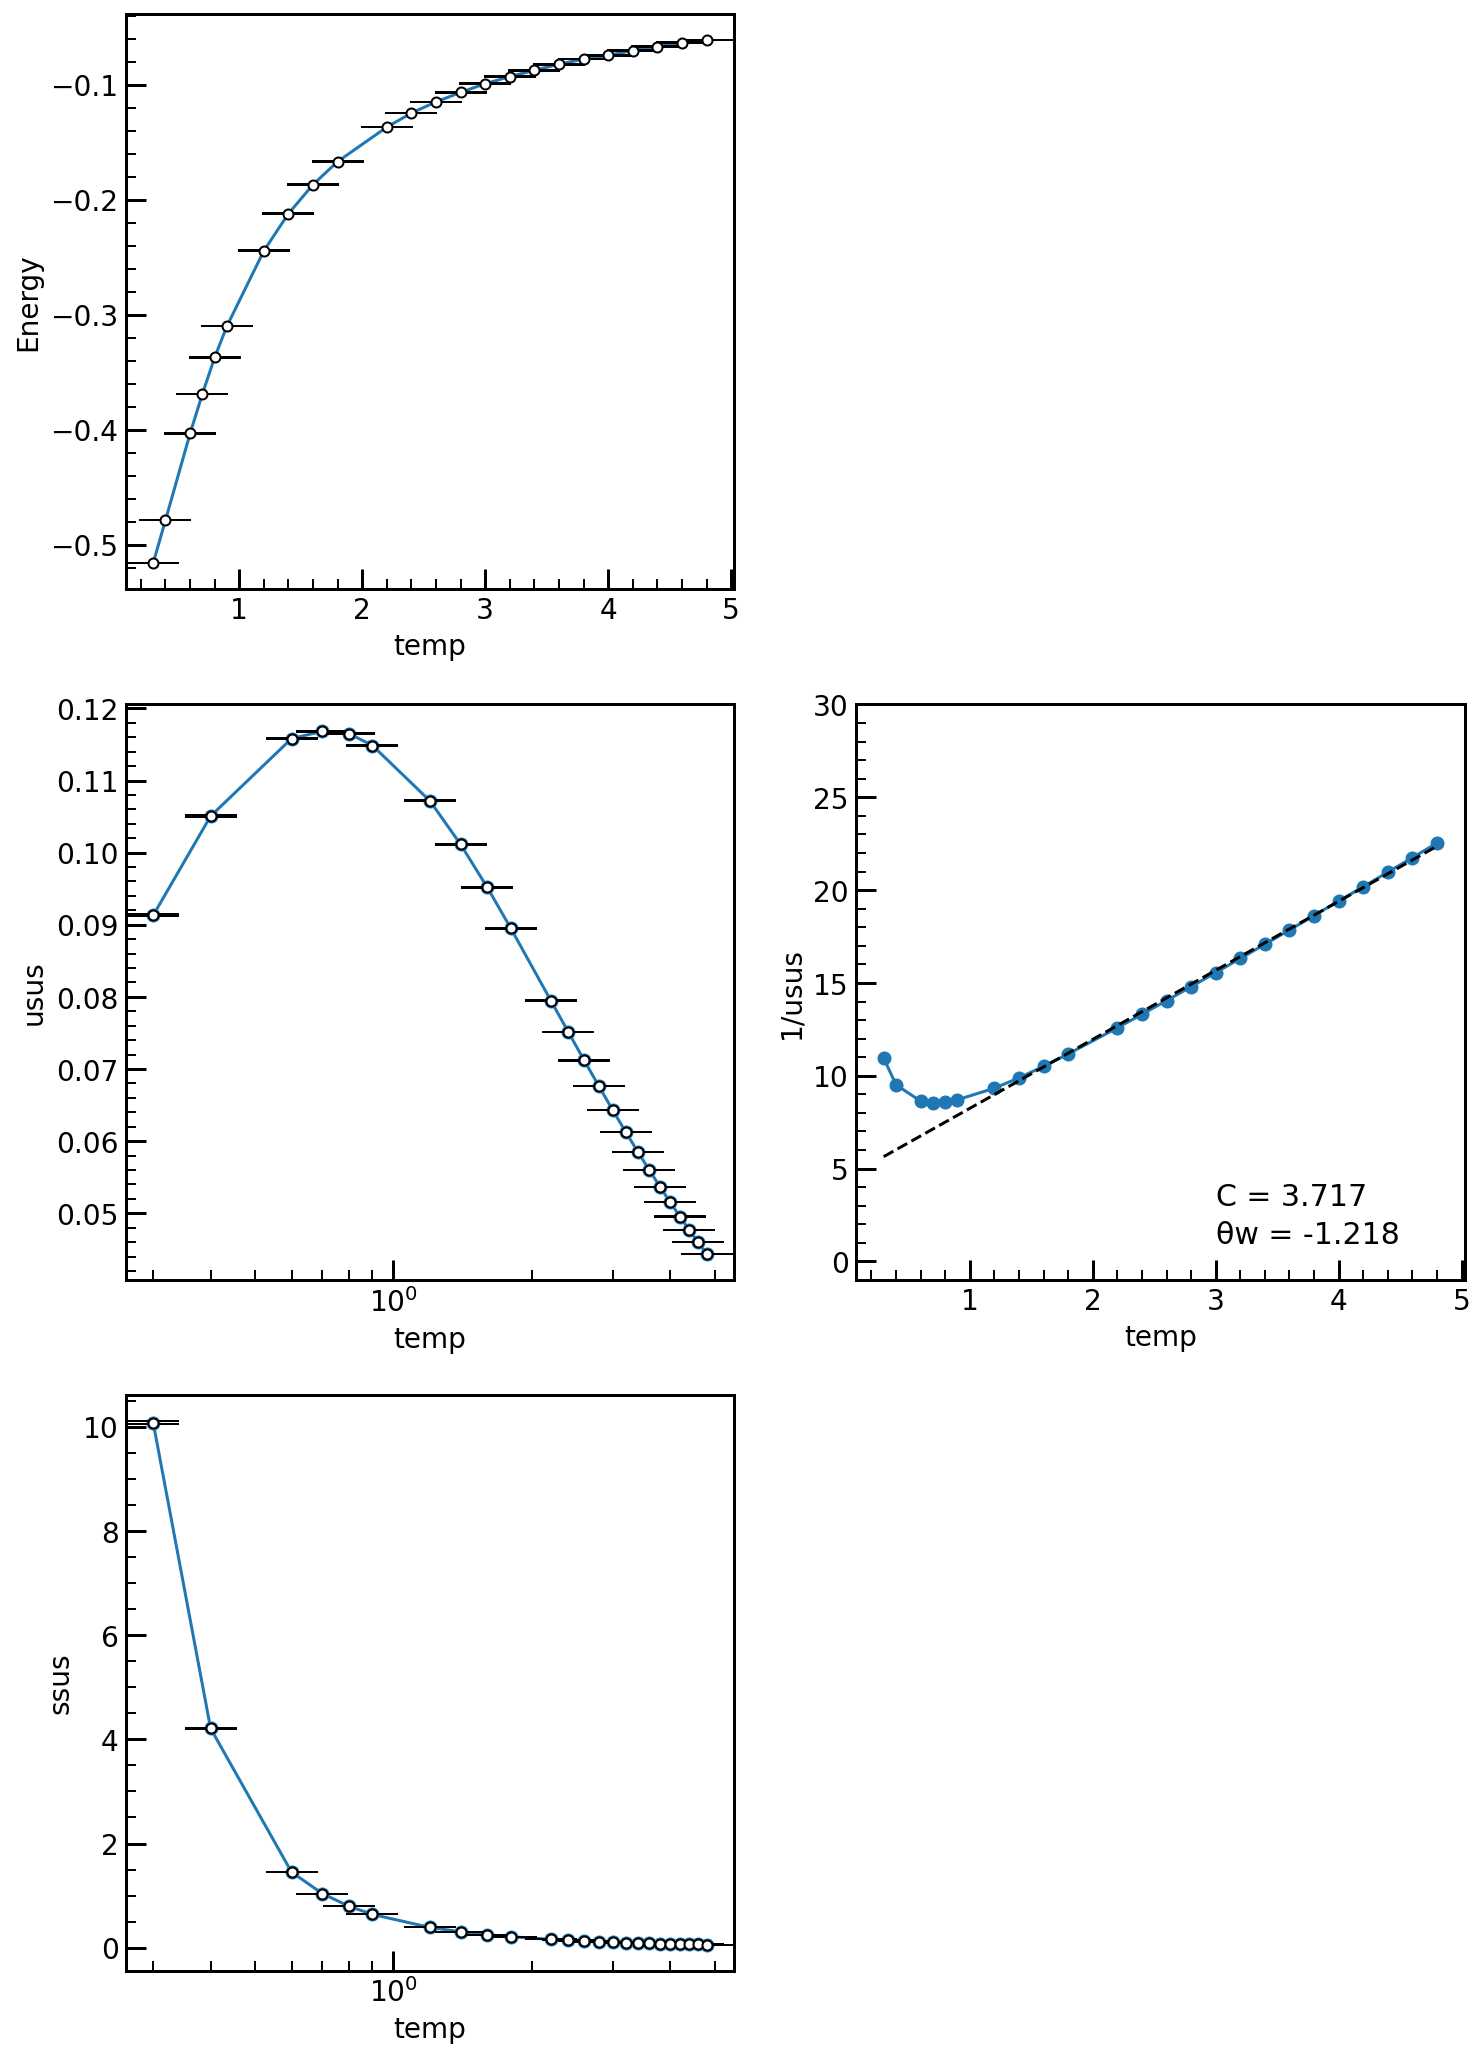

In [68]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, energy)
ax1.errorbar(temp, energy, yerr = energy_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax1.set_ylabel("Energy")
ax1.set_xlabel("temp")

ax3 = fig.add_subplot(gyou,retsu,3)
ax3.plot(temp, usus, marker ='o', label="test")
ax3.errorbar(temp, usus, yerr = usus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax3.set_ylabel("usus")
ax3.set_xscale('log')
ax3.set_xlabel("temp")


ax4 = fig.add_subplot(gyou,retsu,4)
ax4.plot(temp, 1/usus, marker ='o', label="test")
ax4.set_ylabel("1/usus")
ax4.set_xlabel("temp")
ax4.set_ylim(-1,30)
# ax4.set_ylim(-1,22)
#以下は最小二乗法
chaifit = CW_fit(temp,1/usus, 1,5,1)
x = temp
y = chaifit[2]*x + chaifit[3]
ax4.plot(x,y,"--",color = "0")
ax4.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
ax4.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

ax5 = fig.add_subplot(gyou,retsu,5)
ax5.plot(temp, ssus, marker ='o', label="test")
ax5.errorbar(temp, ssus, yerr = ssus_err, capsize=13, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
ax5.set_ylabel("ssus")
# ax2.set_xlim(0,1)
ax5.set_xscale('log')
ax5.set_xlabel("temp")

# ax6 = fig.add_subplot(gyou,retsu,6)
# ax6.plot(temp, 1/ssus, marker ='o', label="test")
# ax6.set_ylabel("1/ssus")
# # ax6.set_xscale('log')
# ax6.set_xlabel("temp")
# #以下は最小二乗法
# chaifit = CW_fit(temp,1/ssus, 1,5,1)
# x = temp
# y = chaifit[2]*x + chaifit[3]
# ax6.plot(x,y,"--",color = "0")
# ax6.text(3,1,"θw = {}".format(round(chaifit[1],3)),fontsize=15)
# ax6.text(3,3,"C = {}".format(round(chaifit[2],3)),fontsize=15)

plt.show()

Text(0.5, 0, 'temp')

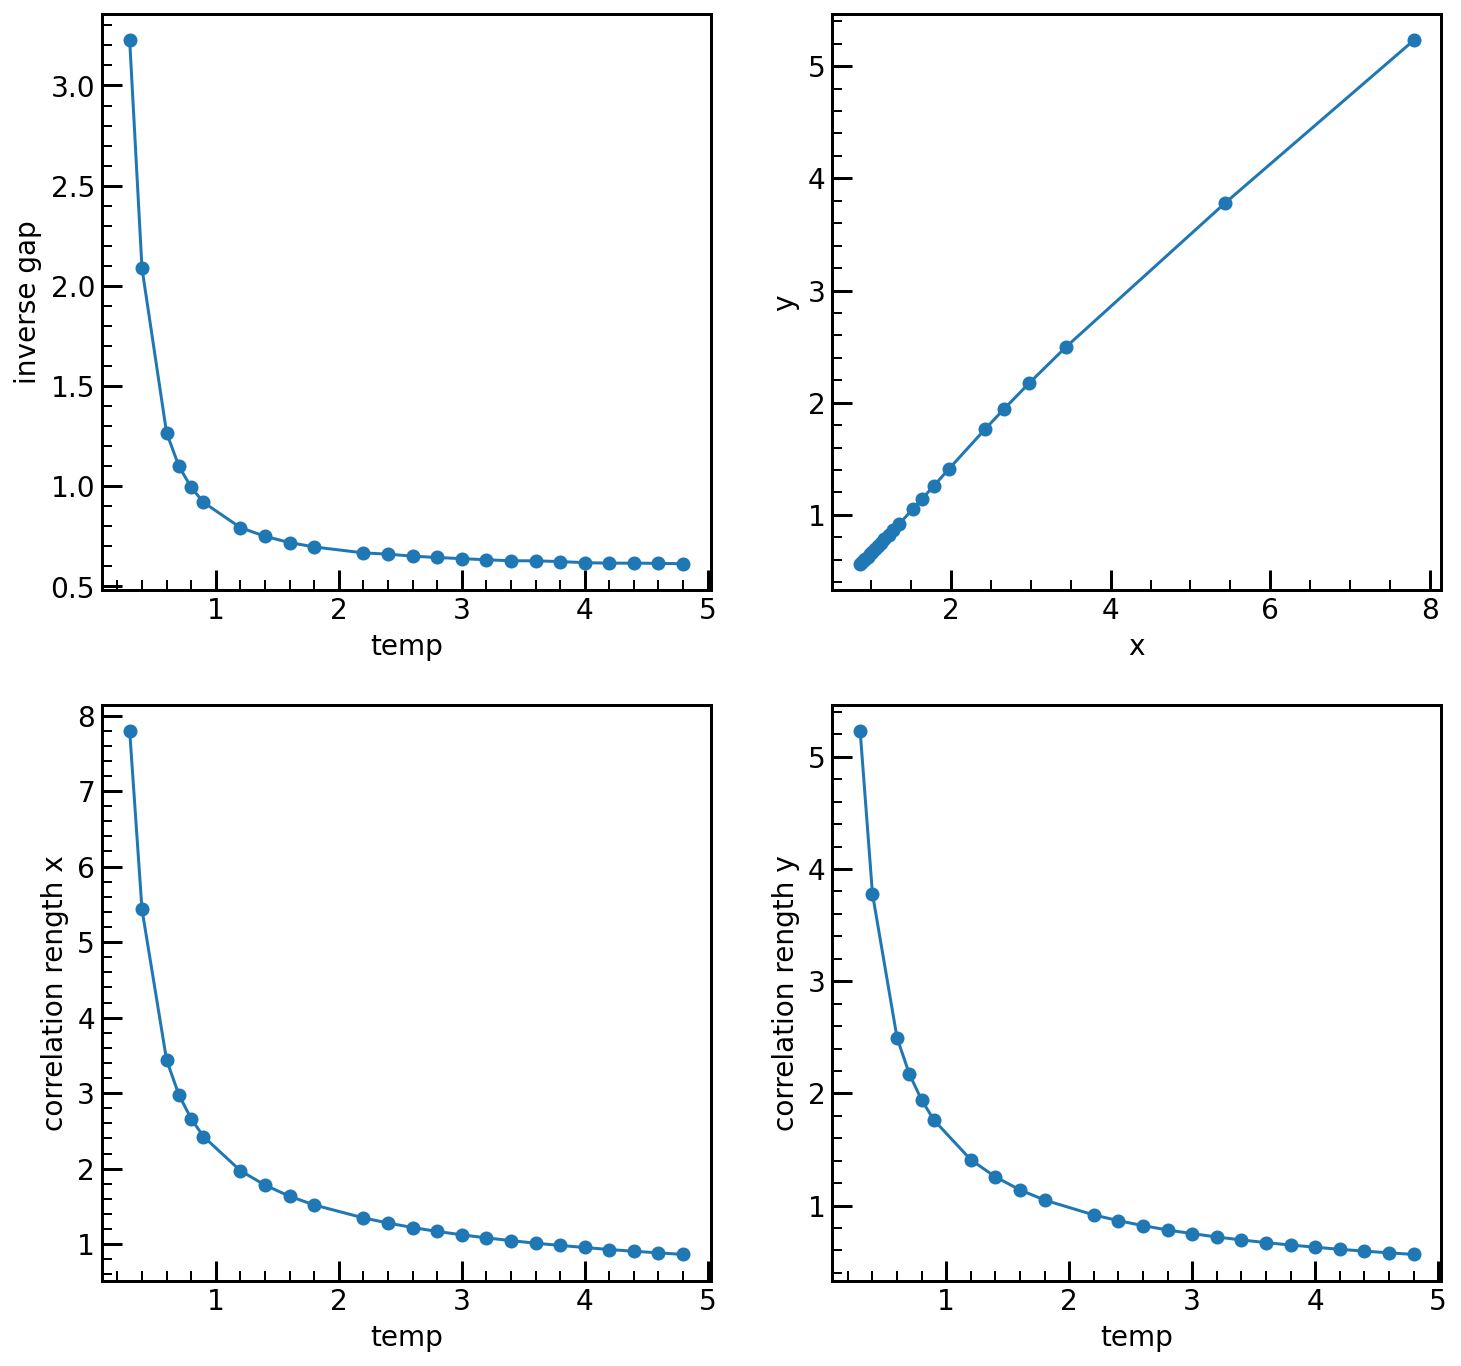

In [69]:
fig = plt.figure(figsize=(12,18))
gyou = 3
retsu = 2
ax1 = fig.add_subplot(gyou,retsu,1)

ax1.plot(temp, inverse_gap, marker ='o', label="test")
ax1.set_ylabel("inverse gap")
ax1.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,2)
ax2.plot(correlation_length_x, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("y")
ax2.set_xlabel("x")

ax2 = fig.add_subplot(gyou,retsu,3)
ax2.plot(temp, correlation_length_x, marker ='o', label="test")
ax2.set_ylabel("correlation rength x")
ax2.set_xlabel("temp")

ax2 = fig.add_subplot(gyou,retsu,4)
ax2.plot(temp, correlation_length_y, marker ='o', label="test")
ax2.set_ylabel("correlation rength y")
ax2.set_xlabel("temp")